![Machine Learning Lab](./banner.jpg)

# Laboratorio 1 - Actividad Práctica

### 0. Instrucciones

1. Esta actividad debe ser entregada por BN antes de la próxima clase (martes antes de las 6 pm) y es de carácter individual. No se permite entregar el laboratorio despues de la fecha establecida.
2. Al responder las preguntas de las actividades por favor marcar las respuestas con la sección a la que corresponden, por ejemplo: `## Exploracion de datos 2.1`. Es preferible que esto lo hagan con secciones de MarkDown como las del tutorial.
3. Por favor nombrar el archivo de acuerdo al siguiente formato `{email}_lab1.ipynb`.
4. Si tienen alguna duda pueden escribirme a mi correo `j.rayom@uniandes.edu.co` o contactarme directamente por Teams

El notebook final debe entregarse con todas las celdas ejecutadas, y debe poderse reproducir los resultados.

### 1. Descarga de datos

Para esta actividad usaremos un dataset de precios y tipos de diamantes

In [4]:
!curl -L -o ../datasets/diamonds-prices-prediction.zip https://www.kaggle.com/api/v1/datasets/download/beridzeg45/diamonds-prices-prediction

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0   123k      0  0:00:01  0:00:01 --:--:--  123k


In [5]:
!unzip ../datasets/diamonds-prices-prediction.zip -d ../datasets/diamonds-prices-prediction

Archive:  ../datasets/diamonds-prices-prediction.zip
  inflating: ../datasets/diamonds-prices-prediction/diamonds (cleaned).csv  


In [6]:
!ls ../datasets/diamonds-prices-prediction

'diamonds (cleaned).csv'


### Exploración de datos (25%)

Realiza las siguientes tareas

1. Cargar el dataset
2. Usa `ydata_profiling` para responder a las siguientes preguntas
   1. ¿Cuáles son las tres columnas con más valores faltantes?
   2. Cual es la media de la columna `Carat Weight`?
    3. Que columnas no son numéricas?

### Preparación de datos (25%)

1. Elimina las tres columnas identificadas en el paso 2.1.
2. Completa con el valor promedio los valores faltantes de las columnas numéricas
3. Completa con el valor más común los valores faltantes de las columnas no numéricas

### Regresión lineal (25%)

1. Separar la variable dependiente `Price` del resto
2. Separar el dataset en train y test con 80% para train y usando como random state 66
3. Codificar como one hot las columnas no numéricas restantes
4. Normalizar (Z-normalization) las columnas numéricas
5. Entrenar el modelo de regresión lineal
6. Realizar predicciones sobre el set de test
7. Conseguir (sobre los datos de testing) R2 MSE MAE
8. Responder: ¿Cuál es la variable con más peso en el modelo? Justifique como llego a esta conclusión.
9. Gráfica para el dataset de testing los valores reales vs. los valores predichos del precio.

### Regresión logística (25%)

1. Separar la variable dependiente `Type` del resto
2. Separar el dataset en train y test con 80% para train y usando como random state 66
3. Codificar como one hot las columnas no numéricas restantes
4. Normalizar (Z-normalization) las columnas numéricas
5. Entrenar el modelo de regresión logística
6. Realizar predicciones sobre el set de test
7. Conseguir (sobre los datos de testing) precision recall f1-score para cada clase predicha
8. Responder: ¿Cuál es la variable con más peso en el modelo para cada categoría? Justifique como llego a esta conclusion.
9. Gráfica para el dataset de testing la matriz de confusion.

### 2. Exploración de datos

#### 2.1 Carga del conjunto de datos

In [7]:
%matplotlib inline

In [8]:
import pandas as pd

In [9]:
diamonds_data = pd.read_csv("../datasets/diamonds-prices-prediction/diamonds (cleaned).csv")
print(diamonds_data.head())

              Shape    Cut Color Clarity  Carat Weight  Length/Width Ratio  \
0  Cushion Modified  Ideal     F    VVS2          1.84                1.02   
1              Pear    NaN     E     VS1          1.20                1.65   
2              Oval    NaN     E     VS1          1.19                1.41   
3             Heart    NaN     D      IF          1.00                1.18   
4           Radiant    NaN     H     VS1          1.01                1.35   

   Depth %  Table %     Polish   Symmetry                        Girdle Culet  \
0     65.8     59.0  Excellent  Very Good               Medium to Thick   NaN   
1     62.5     58.0  Very Good  Very Good               Medium to Thick   NaN   
2     63.1     63.0  Very Good  Very Good               Medium to Thick   NaN   
3     61.7     58.0  Excellent  Excellent  Slightly Thick to Very Thick   NaN   
4     69.4     66.0  Excellent  Very Good                         Thick   NaN   

   Length  Width  Height  Price           Ty

#### 2.2 Uso de ydata_profiling para la exploración de datos

In [10]:
from ydata_profiling import ProfileReport

profile = ProfileReport(diamonds_data, title = "Diamonds Data Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

| Pregunta | Respuesta |
|--------|-----------|
| ¿Cuáles son las columnas con más valores faltantes? | Las tres columnas con más valores faltantes son **Fluorescence** (5264), **Culet** (4594) y **Cut** (4303). |
| ¿Cuál es la media de la columna *Carat Weight*? | La media de la columna **Carat Weight** es **1.2357716**. |
| ¿Qué columnas no son numéricas? | Las columnas no numéricas son **Shape**, **Color**, **Clarity**, **Polish**, **Symmetry**, **Girdle** y **Type**. |


### 3. Preparación de datos

#### 3.1 Eliminación de las columnas identificadas

In [11]:
diamonds_clean = diamonds_data.drop(["Cut", "Culet", "Fluorescence"], axis = 1)
diamonds_clean.dtypes

Shape                  object
Color                  object
Clarity                object
Carat Weight          float64
Length/Width Ratio    float64
Depth %               float64
Table %               float64
Polish                 object
Symmetry               object
Girdle                 object
Length                float64
Width                 float64
Height                float64
Price                   int64
Type                   object
dtype: object

#### 3.2 Completar con el promedio los valores faltantes de las columnas numéricas

In [12]:
numeric_values = diamonds_clean.select_dtypes(include = ["number"])
values_mean = {}

for numeric_value in numeric_values:
    values_mean[numeric_value] = diamonds_clean[numeric_value].mean()

In [13]:
diamonds_clean = diamonds_clean.fillna(values_mean)
diamonds_clean

Shape Color Clarity  Carat Weight  Length/Width Ratio  \
0     Cushion Modified     F    VVS2          1.84                1.02   
1                 Pear     E     VS1          1.20                1.65   
2                 Oval     E     VS1          1.19                1.41   
3                Heart     D      IF          1.00                1.18   
4              Radiant     H     VS1          1.01                1.35   
...                ...   ...     ...           ...                 ...   
6480              Pear     F     VS2          1.02                1.54   
6481             Heart     E    VVS2          1.00                1.16   
6482          Princess     G    VVS1          1.03                1.01   
6483           Radiant     E     VS1          1.06                1.43   
6484           Emerald     H    VVS1          1.00                1.36   

      Depth %  Table %     Polish   Symmetry                        Girdle  \
0        65.8     59.0  Excellent  Very Good               Medium to Thick   
1        62.5     58.0  Very Good  Very Good               Medium to Thick   
2        63.1     63.0  Very Good  Very Good               Medium to Thick   
3        61.7     58.0  Excellent  Excellent  Slightly Thick to Very Thick   
4        69.4     66.0  Excellent  Very Good                         Thick   
...       ...      ...        ...        ...                           ...   
6480     62.9     63.0  Excellent  Very Good           Thick to Very Thick   
6481     58.3     59.0  Excellent  Excellent  Slightly Thick to Very Thick   
6482     72.6     71.0  Excellent  Excellent      Medium to Slightly Thick   
6483     67.8     62.0  Excellent  Excellent       Slightly Thick to Thick   
6484     68.4     66.0  Excellent  Excellent       Slightly Thick to Thick   

      Length  Width  Height  Price           Type  
0       7.09   6.95    4.57   2640  GIA Lab-Grown  
1       9.64   5.86    3.66   1070  GIA Lab-Grown  
2       8.44   6.00    3.79   1070  GIA Lab-Grown  
3       5.85   6.89    4.25   7110            GIA  
4       6.80   5.05    3.50   3050            GIA  
...      ...    ...     ...    ...            ...  
6480    8.60   5.59    3.51   3760            GIA  
6481    6.05   6.99    4.07   4710            GIA  
6482    5.59   5.51    4.00   3270            GIA  
6483    7.24   5.05    3.42   1050  GIA Lab-Grown  
6484    6.51   4.77    3.26   2870            GIA  

[6485 rows x 15 columns]

#### 3.3 Completar con el valor más común los valores faltantes de las columnas no numéricas

In [14]:
categoric_values = diamonds_clean.select_dtypes(include = ["object", "string"])
values_mode = {}

for categoric_value in categoric_values:
    values_mode[categoric_value] = diamonds_clean[categoric_value].mode()[0]

In [15]:
diamonds_clean = diamonds_clean.fillna(values_mode)
diamonds_clean

Shape Color Clarity  Carat Weight  Length/Width Ratio  \
0     Cushion Modified     F    VVS2          1.84                1.02   
1                 Pear     E     VS1          1.20                1.65   
2                 Oval     E     VS1          1.19                1.41   
3                Heart     D      IF          1.00                1.18   
4              Radiant     H     VS1          1.01                1.35   
...                ...   ...     ...           ...                 ...   
6480              Pear     F     VS2          1.02                1.54   
6481             Heart     E    VVS2          1.00                1.16   
6482          Princess     G    VVS1          1.03                1.01   
6483           Radiant     E     VS1          1.06                1.43   
6484           Emerald     H    VVS1          1.00                1.36   

      Depth %  Table %     Polish   Symmetry                        Girdle  \
0        65.8     59.0  Excellent  Very Good               Medium to Thick   
1        62.5     58.0  Very Good  Very Good               Medium to Thick   
2        63.1     63.0  Very Good  Very Good               Medium to Thick   
3        61.7     58.0  Excellent  Excellent  Slightly Thick to Very Thick   
4        69.4     66.0  Excellent  Very Good                         Thick   
...       ...      ...        ...        ...                           ...   
6480     62.9     63.0  Excellent  Very Good           Thick to Very Thick   
6481     58.3     59.0  Excellent  Excellent  Slightly Thick to Very Thick   
6482     72.6     71.0  Excellent  Excellent      Medium to Slightly Thick   
6483     67.8     62.0  Excellent  Excellent       Slightly Thick to Thick   
6484     68.4     66.0  Excellent  Excellent       Slightly Thick to Thick   

      Length  Width  Height  Price           Type  
0       7.09   6.95    4.57   2640  GIA Lab-Grown  
1       9.64   5.86    3.66   1070  GIA Lab-Grown  
2       8.44   6.00    3.79   1070  GIA Lab-Grown  
3       5.85   6.89    4.25   7110            GIA  
4       6.80   5.05    3.50   3050            GIA  
...      ...    ...     ...    ...            ...  
6480    8.60   5.59    3.51   3760            GIA  
6481    6.05   6.99    4.07   4710            GIA  
6482    5.59   5.51    4.00   3270            GIA  
6483    7.24   5.05    3.42   1050  GIA Lab-Grown  
6484    6.51   4.77    3.26   2870            GIA  

[6485 rows x 15 columns]

### 4. Regresión lineal

#### 4.1 Separación de la variable 'price' del resto de variables

In [16]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt


In [17]:
X = diamonds_clean.drop("Price", axis = 1)
y = diamonds_clean["Price"]

X.columns

Index(['Shape', 'Color', 'Clarity', 'Carat Weight', 'Length/Width Ratio',
       'Depth %', 'Table %', 'Polish', 'Symmetry', 'Girdle', 'Length', 'Width',
       'Height', 'Type'],
      dtype='object')

#### 4.2 Separar el dataset en train y test con 80% de los datos para train, usando 66 como valor para el random state

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 66)

#### 4.3 Codificar como one hot las columnas no numéricas restantes

In [21]:
categorical_columns = X.select_dtypes(include = ["object", "category", "string"]).columns.to_list()
categorical_columns

['Shape', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Girdle', 'Type']

In [22]:
preprocessor_linear = ColumnTransformer(transformers = [
    (f"{column}",
     OneHotEncoder(sparse_output = False),
    [column]) for column in categorical_columns],
    remainder = "passthrough"
)

In [23]:
X_train_transformed = preprocessor_linear.fit_transform(X_train) 
X_test_transformed = preprocessor_linear.transform(X_test)

X_train_transformed

array([[ 0.  ,  0.  ,  0.  , ...,  7.08,  8.42,  4.88],
       [ 0.  ,  1.  ,  0.  , ...,  7.39,  7.35,  4.91],
       [ 0.  ,  0.  ,  0.  , ...,  9.27,  5.27,  3.43],
       ...,
       [ 0.  ,  0.  ,  0.  , ..., 10.54,  5.38,  3.36],
       [ 0.  ,  0.  ,  0.  , ...,  7.33,  5.05,  3.38],
       [ 0.  ,  0.  ,  0.  , ...,  9.29,  5.49,  3.26]])

#### 4.4 Normalizar con Z-normalization las columnas numéricas

In [24]:
scaler_linear = StandardScaler()

In [25]:
X_train_scaled = scaler_linear.fit_transform(X_train_transformed)
X_test_scaled = scaler_linear.transform(X_test_transformed)

#### 4.5 Entrenar el modelo de regresión lineal

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train_scaled, y_train)

LinearRegression()

#### 4.6 Realizar predicciones sobre el conjunto de datos de prueba

In [28]:
y_predicted = model.predict(X_test_scaled)
y_predicted

array([ 4777.0351882 ,  3177.63282868,  2126.84198045, ...,
         975.13293941,  4465.85067579, 16621.77452806])

#### 4.7 Cálculo de métricas sobre los datos de prueba

In [29]:
r_2 = r2_score(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)

print("R_2: ", r_2)
print("MSR: ", mse)
print("MAR: ", mae)

R_2:  0.6569847118537111
MSR:  3182046.8603598736
MAR:  1020.3600965821716


#### 4.8 ¿Cúal es la variable con más peso en el modelo?

In [30]:
categorical_features_names = []

for name, transformer, columns in preprocessor_linear.transformers_:
    if isinstance(transformer, OneHotEncoder):
        feature_names = transformer.get_feature_names_out(columns)
        categorical_features_names.extend(feature_names)

In [31]:
remaining_columns = diamonds_clean.select_dtypes(exclude = ["object", "category", "string"]).columns.tolist()

In [32]:
all_features_names = categorical_features_names + remaining_columns[:len(model.coef_) - len(categorical_features_names)]

In [33]:
coefficients = model.coef_
coefficients_dataframe = pd.DataFrame(coefficients, index = all_features_names, columns = ["Coefficient"])

coefficients_dataframe

Coefficient
Shape_Cushion             41.688318
Shape_Cushion Modified    64.549717
Shape_Emerald            155.115853
Shape_Heart             1549.134430
Shape_Marquise         -1168.916639
...                             ...
Depth %                 -933.734536
Table %                 -315.211920
Length                  7180.149899
Width                  -5434.128628
Height                  3253.932775

[67 rows x 1 columns]

In [34]:
max_feature = coefficients_dataframe["Coefficient"].abs().idxmax()
max_value = coefficients_dataframe.loc[max_feature, "Coefficient"]

print("Feature name: ", max_feature)
print("Value: ", max_value)

Feature name:  Length
Value:  7180.149899088564


| Pregunta | Respuesta |
|--------|-----------|
| ¿Cuál es la variable con más peso en el modelo? ¿Cómo se llegó a esa respuesta? | La variable con mayor peso en el modelo es **Length**, con un coeficiente de **7180.149899088564**. Para llegar a esta conclusión, se tomaron todos los coeficientes generados por el modelo lineal y se organizan en un DataFrame junto con sus nombres de variables. Luego, se aplicó el valor absoluto a cada coeficiente para medir su impacto independientemente del signo y se seleccionó el valor máximo. La variable asociada a ese coeficiente máximo es la que tiene mayor influencia en el modelo. |


#### 4.9 Gráfica de valores reales vs valores predichos por el modelo

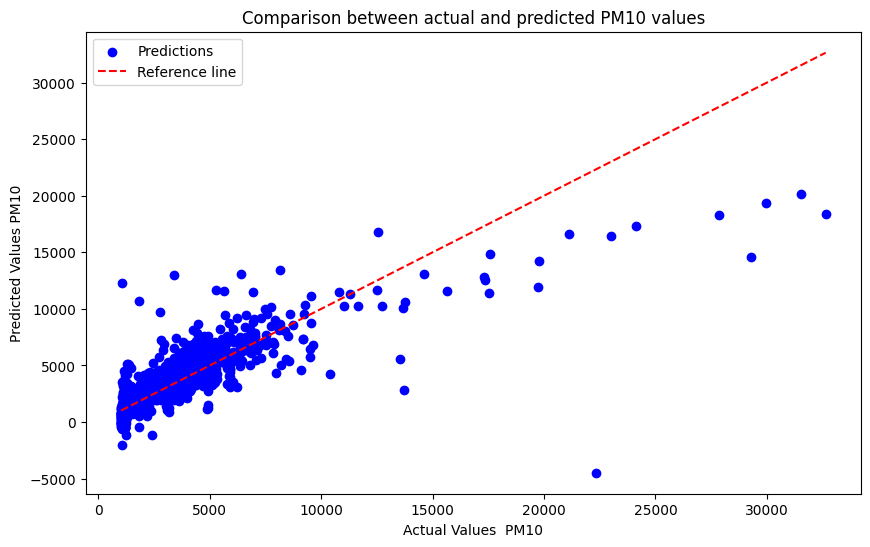

In [35]:
plt.figure(figsize = (10, 6))
plt.scatter(y_test, y_predicted, color = "blue", label = "Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = "red", linestyle = "--", label = "Reference line")
plt.xlabel("Actual Values  PM10")
plt.ylabel("Predicted Values PM10")
plt.title("Comparison between actual and predicted PM10 values")
plt.legend()
plt.show()

### 5. Regresión logística

#### 5.1 Separación de la variable 'type' del resto de variables

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [37]:
X = diamonds_clean.drop("Type", axis = 1)
y = diamonds_clean["Type"]

X.columns

Index(['Shape', 'Color', 'Clarity', 'Carat Weight', 'Length/Width Ratio',
       'Depth %', 'Table %', 'Polish', 'Symmetry', 'Girdle', 'Length', 'Width',
       'Height', 'Price'],
      dtype='object')

#### 5.2 Separar el dataset en train y test con 80% de los datos para train, usando 66 como valor para el random state

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 66)

#### 5.3 Codificar como one hot las columnas no numéricas restantes

In [39]:
categorical_columns = X.select_dtypes(include = ["object", "category", "string"]).columns.to_list()
categorical_columns

['Shape', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Girdle']

In [40]:
preprocessor_logistic = ColumnTransformer(transformers = [
    (f"{column}",
     OneHotEncoder(sparse_output = False),
    [column]) for column in categorical_columns],
    remainder = "passthrough"
)

In [41]:
X_train_transformed = preprocessor_logistic.fit_transform(X_train) 
X_test_transformed = preprocessor_logistic.transform(X_test)

X_train_transformed

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 8.420e+00, 4.880e+00,
        1.055e+04],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 7.350e+00, 4.910e+00,
        2.990e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.270e+00, 3.430e+00,
        5.590e+03],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.380e+00, 3.360e+00,
        1.250e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.050e+00, 3.380e+00,
        1.110e+03],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.490e+00, 3.260e+00,
        3.930e+03]])

#### 5.4 Normalizar con Z-normalization las columnas numéricas

In [42]:
scaler_logistic = StandardScaler()

In [43]:
X_train_scaled = scaler_logistic.fit_transform(X_train_transformed)
X_test_scaled = scaler_logistic.transform(X_test_transformed)

#### 5.5 Entrenar el modelo de regresión logística

In [44]:
model = LogisticRegression(max_iter = 1000)

In [45]:
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

#### 5.6 Relizar predicciones sobre el conjunto de datos de prueba

In [46]:
y_predicted = model.predict(X_test_scaled)

#### 5.7 Cálculo de métricas sobre los datos de prueba

In [47]:
precision = precision_score(y_test, y_predicted, average = None)
recall = recall_score(y_test, y_predicted, average = None)
f1 = f1_score(y_test, y_predicted, average = None)

print("Classes: ", model.classes_)
print()
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

Classes:  ['GIA' 'GIA Lab-Grown' 'IGI Lab-Grown']

Precision:  [0.99250375 0.85652174 0.915     ]
Recall:  [0.99399399 0.84188034 0.92191436]
F1 Score:  [0.99324831 0.84913793 0.91844417]


#### 5.8 ¿Cúal es la variable con más peso en el modelo?

In [48]:
categorical_features_names = []

for name, transformer, columns in preprocessor_logistic.transformers_:
    if isinstance(transformer, OneHotEncoder):
        feature_names = transformer.get_feature_names_out(columns)
        categorical_features_names.extend(feature_names)

In [49]:
remaining_columns = diamonds_clean.select_dtypes(exclude = ["object", "category", "string"]).columns.tolist()

In [50]:
total_features = model.coef_.shape[1]

In [51]:
all_features_names = categorical_features_names + remaining_columns[:total_features - len(categorical_features_names)]

In [52]:
coefficients = model.coef_
coefficients_dataframe = pd.DataFrame(coefficients, index = model.classes_, columns = all_features_names)

coefficients_dataframe

Shape_Cushion  Shape_Cushion Modified  Shape_Emerald  \
GIA                -0.319586               -0.464565      -0.004884   
GIA Lab-Grown      -0.264088                0.345743      -0.020764   
IGI Lab-Grown       0.583673                0.118822       0.025648   

               Shape_Heart  Shape_Marquise  Shape_Oval  Shape_Pear  \
GIA               0.772355        0.376679    0.069885    0.095266   
GIA Lab-Grown    -1.341140       -0.322868   -0.018627   -0.047359   
IGI Lab-Grown     0.568784       -0.053811   -0.051258   -0.047907   

               Shape_Princess  Shape_Radiant  Shape_Round  ...  \
GIA                 -0.973375      -0.655144     0.725995  ...   
GIA Lab-Grown        0.907187       0.827663    -0.172166  ...   
IGI Lab-Grown        0.066188      -0.172518    -0.553828  ...   

               Girdle_Very Thin to Thick  Girdle_Very Thin to Very Thick  \
GIA                             0.020215                        0.098006   
GIA Lab-Grown                  -0.020769                       -0.059979   
IGI Lab-Grown                   0.000554                       -0.038028   

               Carat Weight  Length/Width Ratio   Depth %   Table %    Length  \
GIA               -2.070133           -0.633712  0.286269  0.890942 -0.223779   
GIA Lab-Grown     -0.035284            0.258156 -0.206040 -0.637414  0.654523   
IGI Lab-Grown      2.105417            0.375556 -0.080229 -0.253529 -0.430743   

                  Width    Height     Price  
GIA           -1.007706 -0.800898  3.606184  
GIA Lab-Grown  1.225092  1.592227 -1.663809  
IGI Lab-Grown -0.217386 -0.791329 -1.942375  

[3 rows x 65 columns]

In [53]:
for category in coefficients_dataframe.index:
    var_max = coefficients_dataframe.loc[category].abs().idxmax()  
    coefficient = coefficients_dataframe.loc[category, var_max]      
    print("Category: ", category)
    print("Feature name: ", var_max)
    print("Value", coefficient)
    print()


Category:  GIA
Feature name:  Price
Value 3.606183835221404

Category:  GIA Lab-Grown
Feature name:  Price
Value -1.6638092120790609

Category:  IGI Lab-Grown
Feature name:  Carat Weight
Value 2.1054169153207267



| Pregunta | Respuesta |
|--------|-----------|
| ¿Cuál es la variable con más peso en el modelo de regresión logística? ¿Cómo se llegó a esta respuesta? | En una regresión logística multiclase, cada categoría tiene su propio conjunto de coeficientes, por lo que la variable con mayor peso se identifica **por clase**. Para cada categoría, se tomaron todos los coeficientes del modelo y se calculó el valor absoluto de cada uno para medir su influencia sin importar el signo. Luego, se seleccionó el coeficiente con mayor valor absoluto dentro de cada clase. Los resultados fueron: para la categoría **GIA**, la variable con mayor peso es **Price** con un coeficiente de **3.606183835221404**; para **GIA Lab-Grown**, la variable más influyente es **Price** con un coeficiente de **-1.6638092120790609**; y para **IGI Lab-Grown**, la variable con mayor impacto es **Carat Weight** con un coeficiente de **2.1054169153207267**. El signo del coeficiente indica si la variable aumenta o disminuye la probabilidad de pertenecer a esa categoría. |


#### 5.9 Gráfica de la matirz de confusión

In [54]:
accuracy = accuracy_score(y_test, y_predicted)
conf_matrix = confusion_matrix(y_test, y_predicted)
class_report = classification_report(y_test, y_predicted)

print("Overall Accuracy", accuracy)
print()
print("Confusion Matrix:\n")
print(conf_matrix)
print()
print("Class Report:\n")
print(class_report)

Overall Accuracy 0.9444872783346183

Confusion Matrix:

[[662   3   1]
 [  4 197  33]
 [  1  30 366]]

Class Report:

               precision    recall  f1-score   support

          GIA       0.99      0.99      0.99       666
GIA Lab-Grown       0.86      0.84      0.85       234
IGI Lab-Grown       0.92      0.92      0.92       397

     accuracy                           0.94      1297
    macro avg       0.92      0.92      0.92      1297
 weighted avg       0.94      0.94      0.94      1297



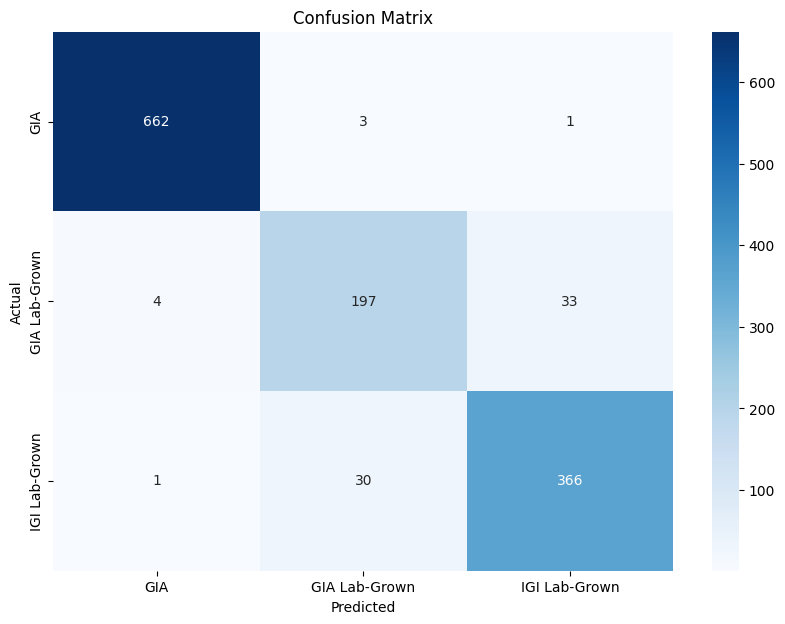


Overall Precision:  0.9444872783346183

Classification Report:

               precision    recall  f1-score   support

          GIA       0.99      0.99      0.99       666
GIA Lab-Grown       0.86      0.84      0.85       234
IGI Lab-Grown       0.92      0.92      0.92       397

     accuracy                           0.94      1297
    macro avg       0.92      0.92      0.92      1297
 weighted avg       0.94      0.94      0.94      1297


Model Coefficients:

               Shape_Cushion  Shape_Cushion Modified  Shape_Emerald  \
GIA                -0.319586               -0.464565      -0.004884   
GIA Lab-Grown      -0.264088                0.345743      -0.020764   
IGI Lab-Grown       0.583673                0.118822       0.025648   

               Shape_Heart  Shape_Marquise  Shape_Oval  Shape_Pear  \
GIA               0.772355        0.376679    0.069885    0.095266   
GIA Lab-Grown    -1.341140       -0.322868   -0.018627   -0.047359   
IGI Lab-Grown     0.568784    

In [55]:
plt.figure(figsize = (10, 7))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues", xticklabels = model.classes_, yticklabels = model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print()
print("Overall Precision: ", accuracy)
print()
print("Classification Report:\n")
print(class_report)
print()
print("Model Coefficients:\n")
print(coefficients_dataframe)